# Script contents:
1. Importing libraries and datframe
2. Data cleaning
3. Data prep
4. Regression analysis

### 1. Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#for the created graphs to be displayed in the notebook
%matplotlib inline

In [4]:
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 6\Global aqi and respiratory health outcomes'

In [5]:
df_aqi=df_aqi=pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'air_quality_cleaned.csv'),index_col=False)

### 2. Data cleaning

In [6]:
df_aqi.head()

,Unnamed: 0,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [8]:
df_aqi.shape

(2192, 13)

In [9]:
## check for missing values
df_aqi.isnull().sum()     ##no missing values

Unnamed: 0             0
city                   0
date                   0
aqi                    0
pm2_5                  0
pm10                   0
no2                    0
o3                     0
temperature            0
humidity               0
hospital_admissions    0
population_density     0
hospital_capacity      0
dtype: int64

In [12]:
## check for duplicates
dups=df_aqi.duplicated()


In [14]:
dups.shape  ##no duplicates found

(2192,)

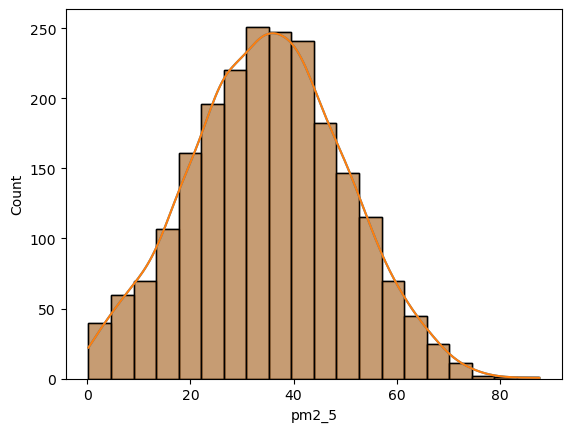

In [16]:
## extreme value checks for pm2.5
sns.histplot(df_aqi['pm2_5'], bins=20, kde = True)
plt.show()

In [17]:
## descriptives of pm2.5
df_aqi['pm2_5'].mean()

34.926277372262774

In [18]:
df_aqi['pm2_5'].max()

87.7

In [19]:
df_aqi['pm2_5'].min()

0.2

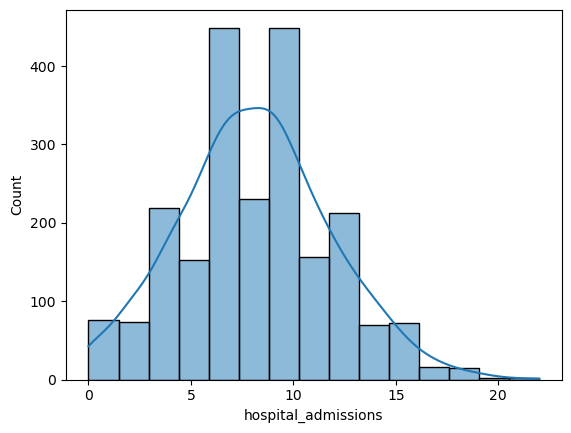

In [21]:
## extreme value check for hospital admissions
sns.histplot(df_aqi['hospital_admissions'], bins=15, kde = True)
plt.show()

In [23]:
## descriptives for hospital admissions
df_aqi['hospital_admissions'].mean()

8.125456204379562

In [24]:
df_aqi['hospital_admissions'].max()

22

In [25]:
df_aqi['hospital_admissions'].min()

0

In [26]:
zero_admissions = df_aqi[df_aqi['hospital_admissions'] == 0]

In [28]:
len(zero_admissions)

37

In [29]:
print(zero_admissions)

      Unnamed: 0         city        date  aqi  pm2_5  pm10   no2    o3  \
59            59        Delhi  2020-02-29   81    8.6  30.1  17.5  39.2   
63            63  Los Angeles  2020-03-04    2    4.9  41.6  38.2  37.7   
64            64  Mexico City  2020-03-05  240   33.8  61.9  38.4  27.4   
274          274  Mexico City  2020-10-01  139   38.4  56.7  20.4  37.1   
287          287      Beijing  2020-10-14  478    8.3  52.6  52.4  12.4   
297          297       London  2020-10-24  369   27.6  47.1  21.8  43.4   
311          311      Beijing  2020-11-07  299    4.8  79.1  38.0  52.4   
314          314      Beijing  2020-11-10  348   11.7  22.8  20.6  10.4   
368          368      Beijing  2021-01-03  382   35.3  28.1  23.4  18.4   
572          572      Beijing  2021-07-26  205    4.3   2.0  27.1  33.5   
634          634        Delhi  2021-09-26  408   30.7  35.6  25.1  24.6   
731          731        Delhi  2022-01-01  100   20.2  62.9  39.2  46.9   
735          735  Mexico 

In [31]:
print(zero_admissions[['pm2_5', 'city','hospital_admissions']])

      pm2_5         city  hospital_admissions
59      8.6        Delhi                    0
63      4.9  Los Angeles                    0
64     33.8  Mexico City                    0
274    38.4  Mexico City                    0
287     8.3      Beijing                    0
297    27.6       London                    0
311     4.8      Beijing                    0
314    11.7      Beijing                    0
368    35.3      Beijing                    0
572     4.3      Beijing                    0
634    30.7        Delhi                    0
731    20.2        Delhi                    0
735     2.1  Mexico City                    0
797    28.9        Delhi                    0
881    19.5  Mexico City                    0
999    48.3        Delhi                    0
1051    5.3        Delhi                    0
1058   29.1      Beijing                    0
1125   22.9  Mexico City                    0
1143   30.9       London                    0
1232   36.6        Delhi          

#### After careful consideration, I have decided to keep the values with 0 hospital admissions. We want to see if higher PM2.5 levels increase hospital admissions, so dropping them would mean that we are only looking at data with hospital admissions and can create bias. 

## 3. Data prep for regression analysis

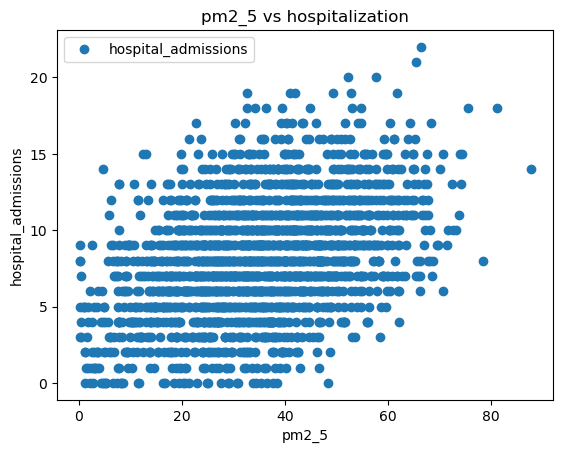

In [33]:
# Create a scatterplot using matplotlib
df_aqi.plot(x = 'pm2_5', y='hospital_admissions',style='o') 
plt.title('pm2_5 vs hospitalization')  
plt.xlabel('pm2_5')  
plt.ylabel('hospital_admissions')  
plt.show()

In [34]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_aqi['pm2_5'].values.reshape(-1,1)
y = df_aqi['hospital_admissions'].values.reshape(-1,1)

In [35]:
X

array([[34. ],
       [33.7],
       [43. ],
       ...,
       [43.2],
       [54.5],
       [54.3]])

In [37]:
y

array([[ 5],
       [ 4],
       [10],
       ...,
       [12],
       [12],
       [ 9]], dtype=int64)

In [38]:
len(y)

2192

In [39]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

In [40]:
# Create a regression object.
regress = LinearRegression() 

In [41]:
# Fit the regression object onto the training set.
regress.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regress.predict(X_test)

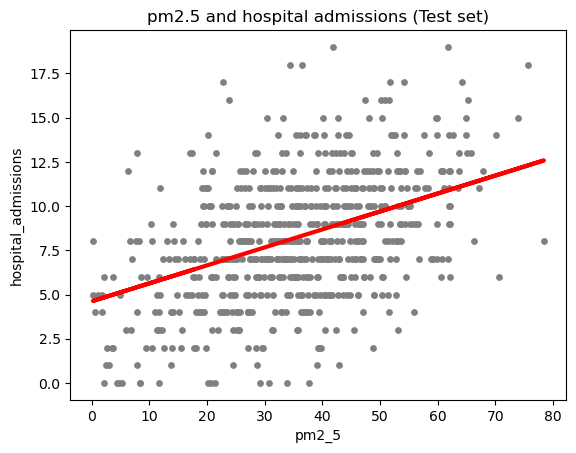

In [44]:
# Create a plot showing the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('pm2.5 and hospital admissions (Test set)')
plot_test.xlabel('pm2_5')
plot_test.ylabel('hospital_admissions')
plot_test.show()

### There is a positive upward trend but line of best fit is not very steep indicating a weak relation. There are still a large number of data points with both low and high hospital admissions irrespective of pm2.5 levels.  

#### Model summary statistics

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)  

In [49]:
print('Slope:' ,regress.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10156414]]
Mean squared error:  10.28359345142095
R2 score:  0.2052169066435121


In [51]:
## Also checking the SD and variance for better understanding

print(df_aqi['hospital_admissions'].var())   # Variance
print(df_aqi['hospital_admissions'].std())   # Standard deviation

13.807621882152326
3.715860853443294


### The slope indicates a positive relation between pm2.5 and hospital admissions. R2 is very small which means that pm2.5 alone is not a good predictor for capturing the outcome. 

In [50]:
df_aqi_model = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_aqi_model.head(30)

,Actual,Predicted
0,11,9.046316
1,11,9.086942
2,0,5.806420
3,12,9.269757
4,4,7.370508
5,4,7.370508
6,10,6.720497
7,12,7.329882
8,0,6.669715
9,7,7.461916


#### A sidealong comparison between the predicted and actual values show that there is a big differnece between the two. This means that the mmodel is not doing a great job in explaining the relationship between the two variables. maybe pm2.5 alone is not the only predictor variable responsible for hospital admissions. 

### It is essential to look at other factors for hospital admissions, like flu season, festival season(in India, the pollution rises greatly around this time), weather etc. Maybe there is a bias in how the hospital admissions data was collected and recorded. There might be other overlapping factors influencing the number. 

In [52]:
## export the data
df_aqi.to_csv(os.path.join(path, 'Data', 'Prepared data','air_quality_cleaned.csv'))